### Data Exploration

In this stage the corpus is explored to understand the common key words, content, relationship and presence of level of noise. This can be achieved by creating basic statistics and embracing visualization techniques such as word frequency count, word co-occurrence or correlation plot etc. which will help us to discover hidden patterns if any. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 

# Create a dictionary with key as file names and values as text for all files in a given folder
def CorpusFromDir(dir_path):
    result = dict(docs = [open(os.path.join(dir_path,f)).read() for f in os.listdir(dir_path)],
               ColNames = map(lambda x: x, os.listdir(dir_path)))
    return result

docs = CorpusFromDir('Data/text_files/')

# Initialize
vectorizer = CountVectorizer()
doc_vec = vectorizer.fit_transform(docs.get('docs'))

#create dataFrame
df = pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names())

# Change column headers to be file names
df.columns = docs.get('ColNames')
print (df)

             Doc_2.txt  Doc_3.txt  Doc_1.txt
analytics            1          0          1
and                  1          1          1
are                  1          0          1
books                0          1          0
domain               1          0          0
equally              0          0          1
for                  1          0          1
important            1          0          1
knowledge            1          0          0
like                 0          1          0
programming          0          0          1
reading              0          1          0
skills               1          0          2
statistics           1          0          1
travelling           0          1          0


In [2]:
from sklearn.metrics.pairwise import cosine_similarity

print ("Similarity b/w doc 1 & 2: ", cosine_similarity([df['Doc_1.txt']], [df['Doc_2.txt']]))
print ("Similarity b/w doc 1 & 3: ", cosine_similarity([df['Doc_1.txt']], [df['Doc_3.txt']]))
print ("Similarity b/w doc 2 & 3: ", cosine_similarity([df['Doc_2.txt']], [df['Doc_3.txt']]))

Similarity b/w doc 1 & 2:  [[0.76980036]]
Similarity b/w doc 1 & 3:  [[0.12909944]]
Similarity b/w doc 2 & 3:  [[0.1490712]]


### Frequency Chart

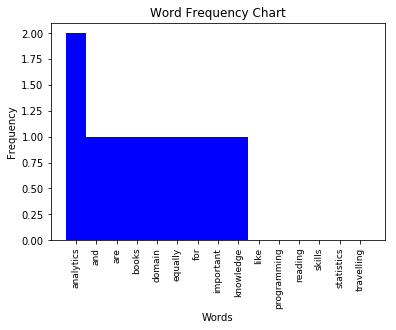

In [3]:
words = df.index
freq = df['Doc_1.txt'].sort_values(ascending=False, inplace=False)

pos = np.arange(len(words))
width=1.0
ax=plt.axes(frameon=True)
ax.set_xticks(pos)
ax.set_xticklabels(words, rotation='vertical', fontsize=9)
ax.set_title('Word Frequency Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.bar(pos, freq, width, color='b')
plt.show()

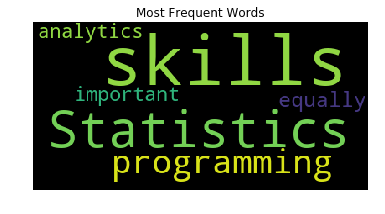

In [4]:
from wordcloud import WordCloud

# Read the whole text.
text = open('Data/text_files/Doc_1.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud.recolor(random_state=2019))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

### Lexical Dispersion Plot

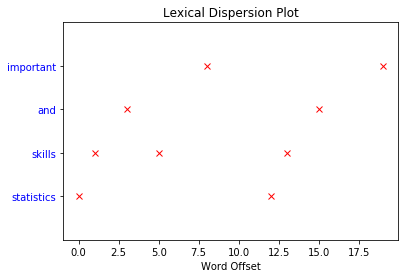

In [5]:
from nltk import word_tokenize

def dispersion_plot(text, words):
    words_token = word_tokenize(text)
    points = [(x,y) for x in range(len(words_token)) for y in range(len(words)) if words_token[x] == words[y]]

    if points:
        x,y=zip(*points)
    else:
        x=y=()

    plt.plot(x,y,"rx",scalex=.1)
    plt.yticks(range(len(words)),words,color="b")
    plt.ylim(-1,len(words))
    plt.title("Lexical Dispersion Plot")
    plt.xlabel("Word Offset")
    plt.show()

text = 'statistics skills, and programming skills are equally important for analytics. statistics skills, and domain knowledge are important for analytics'


dispersion_plot(text, ['statistics', 'skills', 'and', 'important'])

### Co-occurrence Matrix

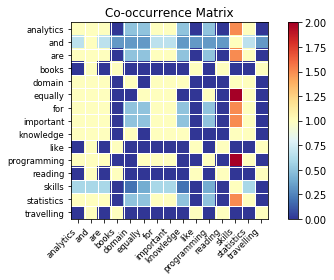

In [6]:
import statsmodels.api as sm
import scipy.sparse as sp

# default unigram model
count_model = CountVectorizer(ngram_range=(1,1)) 
docs_unigram = count_model.fit_transform(docs.get('docs'))

# co-occurrence matrix in sparse csr format
docs_unigram_matrix = (docs_unigram.T * docs_unigram) 

# fill same word cooccurence to 0
docs_unigram_matrix.setdiag(0) 

# co-occurrence matrix in sparse csr format
docs_unigram_matrix = (docs_unigram.T * docs_unigram) 
docs_unigram_matrix_diags = sp.diags(1./docs_unigram_matrix.diagonal())

# normalized co-occurence matrix
docs_unigram_matrix_norm = docs_unigram_matrix_diags * docs_unigram_matrix 

df = pd.DataFrame(docs_unigram_matrix_norm.todense(), index = count_model.get_feature_names())
df.columns = count_model.get_feature_names()

sm.graphics.plot_corr(df, title='Co-occurrence Matrix', xnames=list(df.index))
plt.show()